In [16]:
#import the libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving zomato_reviews.csv to zomato_reviews.csv


In [3]:
# Get the data
df = pd.read_csv('zomato_reviews.csv')

In [4]:
def get_sentiment(review_text):
    """
    Performs sentiment analysis on a review text using TextBlob.
    Returns the sentiment polarity score and sentiment class.
    """
    blob = TextBlob(str(review_text))
    sentiment_score = blob.sentiment.polarity
    
    if sentiment_score > 0:
        sentiment_class = 'Positive'
    elif sentiment_score < 0:
        sentiment_class = 'Negative'
    else:
        sentiment_class = 'Neutral'
    
    return sentiment_score, sentiment_class

In [5]:
# Handle missing values
df.dropna(subset=['review'], inplace=True)

In [8]:
# Apply sentiment analysis function to reviews
df['Sentiment_Score'], df['Sentiment_Class'] = zip(*df['review'].apply(get_sentiment))

In [9]:
# Prepare the data for training
X = df['review'].values
y = df['Sentiment_Class'].values

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Sentiment_Class'], test_size=0.3, random_state=42)

In [24]:
# Apply sentiment analysis to training data
X_train_blob = [TextBlob(str(review)) for review in X_train]
X_train_sentiment = [blob.sentiment.polarity for blob in X_train_blob]

In [26]:
# Fit the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(np.array(X_train_sentiment).reshape(-1, 1), y_train)

LogisticRegression(random_state=42)

In [18]:
# Apply sentiment analysis to testing data
X_test_blob = [TextBlob(str(review)) for review in X_test]
X_test_sentiment = [blob.sentiment.polarity for blob in X_test_blob]

In [19]:
# Predict sentiment classes for testing data
y_pred = lr.predict(np.array(X_test_sentiment).reshape(-1, 1))

In [20]:
# Print dataset with sentiment class and score
print(df)

      Unnamed: 0  rating                                             review  \
0              0       5                                               nice   
1              1       5  best biryani , so supportive staff of outlet ,...   
2              2       4     delivery boy was very decent and supportive.👌👍   
3              3       1  worst biryani i have tasted in my life, half o...   
4              4       5  all food is good and tasty . will order again ...   
...          ...     ...                                                ...   
5474        5474       5                                           complain   
5475        5475       5  it took 1 hour to assign valvet and thn prepar...   
5476        5476       5  took for an hour to prepare 3 khawsa, which in...   
5477        5477       1  very very late, littrally did time pass and it...   
5478        5478       1  Taste was stale and they give only 5 pieces in...   

      Sentiment_Score Sentiment_Class  
0          

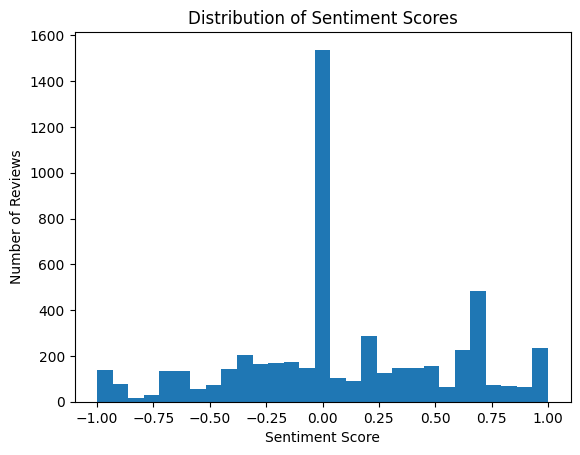

In [21]:
# Create histogram of sentiment scores
plt.hist(df['Sentiment_Score'], bins='auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [22]:
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9543795620437956
